# Assignment #8
### Gagana Uday Kumar (WOV796)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns


### 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows: 
### rng = np.random.default_rng(5)
### x1 = rng.uniform(size=500) - 0.5
### x2 = rng.uniform(size=500) - 0.5
### y = x1**2 - x2**2 > 0

In [2]:
np.random.seed(5)
n = 500
x1 = np.random.uniform(size=n) - 0.5
x2 = np.random.uniform(size=n) - 0.5
y = (x1**2 - x2**2 > 0).astype(int)

### (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

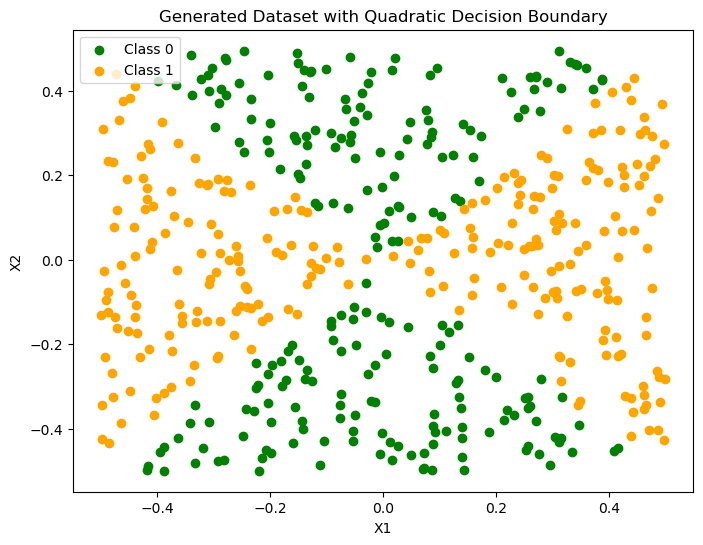

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x1[y == 0], x2[y == 0], color='green', label='Class 0')
plt.scatter(x1[y == 1], x2[y == 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Dataset with Quadratic Decision Boundary')
plt.legend()
plt.show()

### (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [5]:
X = np.column_stack((x1, x2))
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

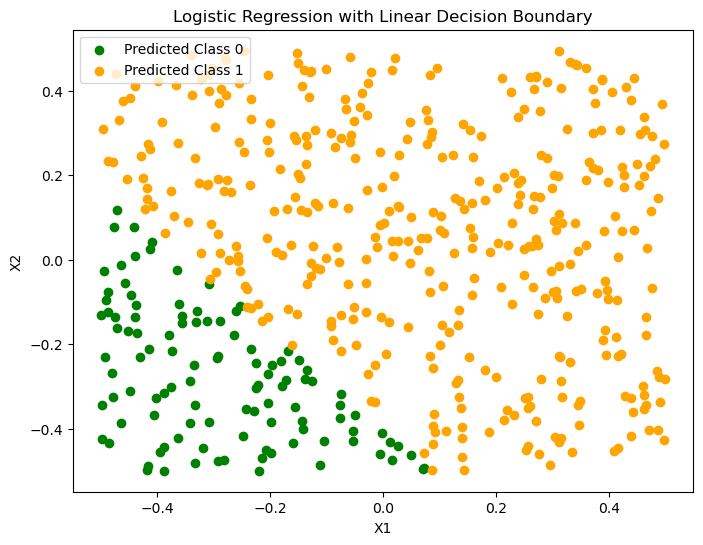

In [9]:
y_pred_linear = log_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred_linear == 0][:, 0], X[y_pred_linear == 0][:, 1], color='Green', label='Predicted Class 0')
plt.scatter(X[y_pred_linear == 1][:, 0], X[y_pred_linear == 1][:, 1], color='orange', label='Predicted Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Linear Decision Boundary')
plt.legend()
plt.show()

### (e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X2 1 , X1×X2, log(X2), and so forth).

In [11]:
X_nonlinear = np.column_stack((x1, x2, x1**2, x2**2, x1*x2))

# Fit a logistic regression model using non-linear features
model_nonlinear = LogisticRegression()
model_nonlinear.fit(X_nonlinear, y)

LogisticRegression()

### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

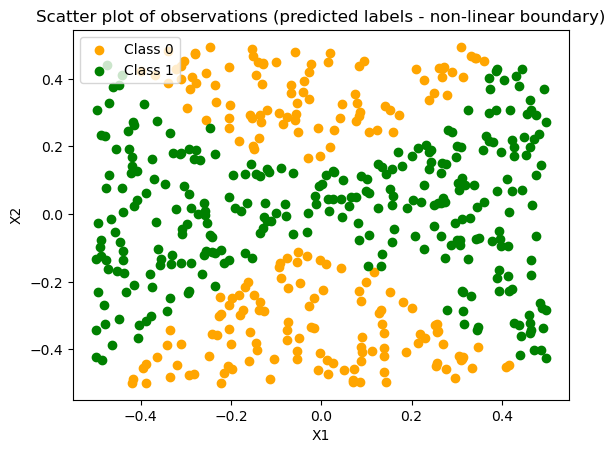

In [13]:
pred_labels_nonlinear = model_nonlinear.predict(X_nonlinear)

# Plot the observations colored according to the predicted class labels
plt.scatter(x1[pred_labels_nonlinear == 0], x2[pred_labels_nonlinear == 0], color='orange', label='Class 0')
plt.scatter(x1[pred_labels_nonlinear == 1], x2[pred_labels_nonlinear == 1], color='green', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of observations (predicted labels - non-linear boundary)')
plt.legend()
plt.show()

### (g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

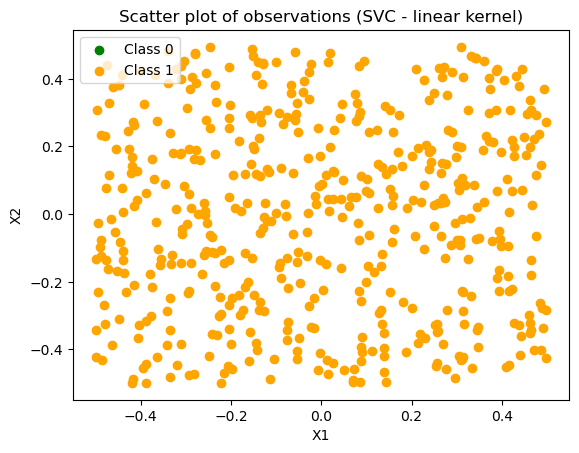

In [29]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)

# Obtain a class prediction for each training observation
pred_labels_svc_linear = svc_linear.predict(X)

# Plot the observations colored according to the predicted class labels
plt.scatter(x1[pred_labels_svc_linear == 0], x2[pred_labels_svc_linear == 0], color='green', label='Class 0')
plt.scatter(x1[pred_labels_svc_linear == 1], x2[pred_labels_svc_linear == 1], color='orange', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of observations (SVC - linear kernel)')
plt.legend()
plt.show()

### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

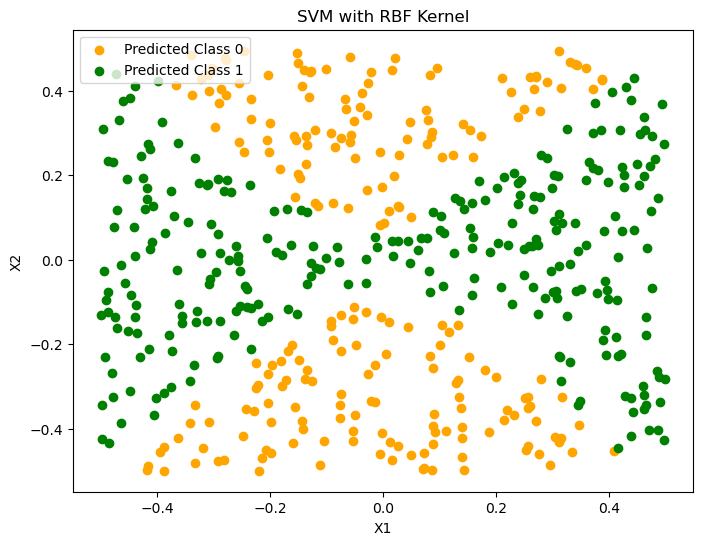

In [28]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X, y)
y_pred_rbf = svm_rbf.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred_rbf == 0][:, 0], X[y_pred_rbf == 0][:, 1], color='orange', label='Predicted Class 0')
plt.scatter(X[y_pred_rbf == 1][:, 0], X[y_pred_rbf == 1][:, 1], color='green', label='Predicted Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM with RBF Kernel')
plt.legend()
plt.show()

### (i) Comment on your results.

In [22]:
print("Summary of results:")
print(f"Linear Logistic Regression - Accuracy: {accuracy_score(y, y_pred_linear):.2%}")
print(f"Non-Linear Logistic Regression - Accuracy: {accuracy_score(y, pred_labels_nonlinear):.2%}")
print(f"SVM with Linear Kernel - Accuracy: {accuracy_score(y, y_pred_svc):.2%}")
print(f"SVM with RBF Kernel - Accuracy: {accuracy_score(y, y_pred_rbf):.2%}")

Summary of results:
Linear Logistic Regression - Accuracy: 53.00%
Non-Linear Logistic Regression - Accuracy: 94.40%
SVM with Linear Kernel - Accuracy: 52.60%
SVM with RBF Kernel - Accuracy: 97.40%


The results indicate that models capable of capturing non-linear decision boundaries significantly outperform those restricted to linear boundaries. Linear logistic regression and SVM with a linear kernel both struggled to classify the data accurately, achieving accuracies near chance. In contrast, non-linear logistic regression and SVM with an RBF kernel excelled, achieving high accuracies of 94.40% and 97.40%, respectively. These results emphasize the importance of selecting a model that aligns with the complexity of the decision boundary in the data, particularly when it is non-linear.

### 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [10]:
Auto = pd.read_csv('Auto.csv',na_values=['?'])
Auto = Auto.dropna()
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [11]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [12]:
# Calculate the median mpg
median_mpg = Auto['mpg'].median()

# Create a binary column for high or low gas mileage
Auto['high_mpg'] = (Auto['mpg'] > median_mpg).astype(int)

# Display the first few rows to verify the new column
print(Auto.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  high_mpg  
0       1  chevrolet chevelle malibu         0  
1       1          buick skylark 320         0  
2       1         plymouth satellite         0  
3       1              amc rebel sst         0  
4       1                ford torino         0  


### (b) Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

In [15]:
# Define the features and target
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = Auto['high_mpg']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of C values to experiment with
C_values = [0.1, 1, 10, 100, 1000]

# Fit the SVC model with different values of C and perform cross-validation
for C in C_values:
    svc_model = SVC(C=C, kernel='linear', random_state=1)
    cv_scores = cross_val_score(svc_model, X_scaled, y, cv=10, scoring='accuracy')
    print(f"C={C}: Mean CV Accuracy = {cv_scores.mean():.4f}")


C=0.1: Mean CV Accuracy = 0.8928
C=1: Mean CV Accuracy = 0.9033
C=10: Mean CV Accuracy = 0.9033
C=100: Mean CV Accuracy = 0.9008
C=1000: Mean CV Accuracy = 0.9008


### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Comment on your results.

In [16]:
# Define parameter grids for radial and polynomial kernels
param_grid_radial = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3],
    'kernel': ['poly']
}

# GridSearchCV for radial kernel
grid_search_radial = GridSearchCV(SVC(random_state=1), param_grid=param_grid_radial, cv=10, scoring='accuracy')
grid_search_radial.fit(X_scaled, y)

# GridSearchCV for polynomial kernel
grid_search_poly = GridSearchCV(SVC(random_state=1), param_grid=param_grid_poly, cv=10, scoring='accuracy')
grid_search_poly.fit(X_scaled, y)

# Print the best parameters and best scores
print(f"Best parameters (Radial Kernel): {grid_search_radial.best_params_}")
print(f"Best accuracy (Radial Kernel): {grid_search_radial.best_score_:.4f}")
print(f"Best parameters (Poly Kernel): {grid_search_poly.best_params_}")
print(f"Best accuracy (Poly Kernel): {grid_search_poly.best_score_:.4f}")


Best parameters (Radial Kernel): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best accuracy (Radial Kernel): 0.9131
Best parameters (Poly Kernel): {'C': 10, 'degree': 3, 'kernel': 'poly'}
Best accuracy (Poly Kernel): 0.9034


### (d) Make some plots to back up your assertions in (b) and (c).
### Hint: In the lab, we used the plot_svm() function for fitted SVMs. When p > 2, you can use the keyword argument features to create plots displaying pairs of variables at a time.

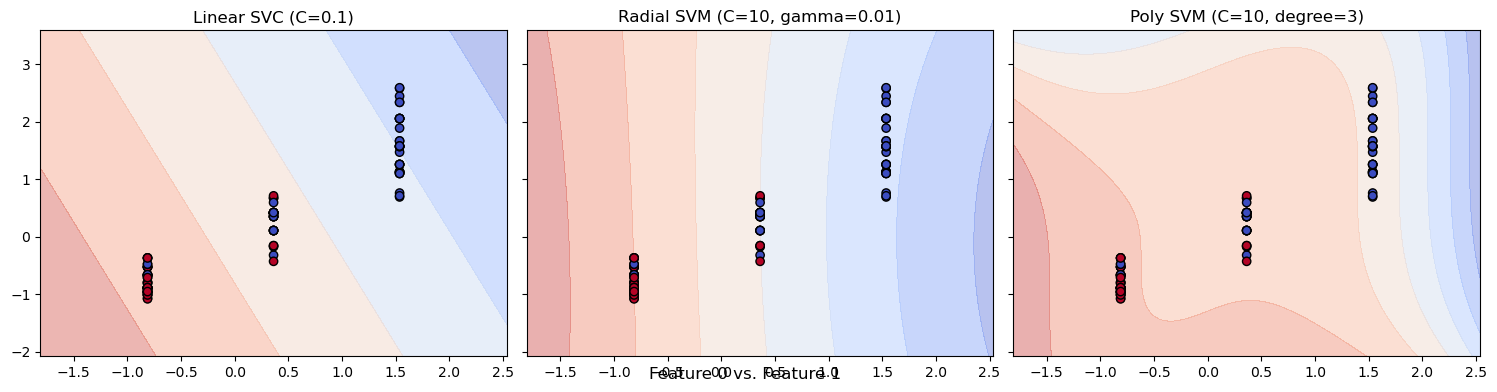

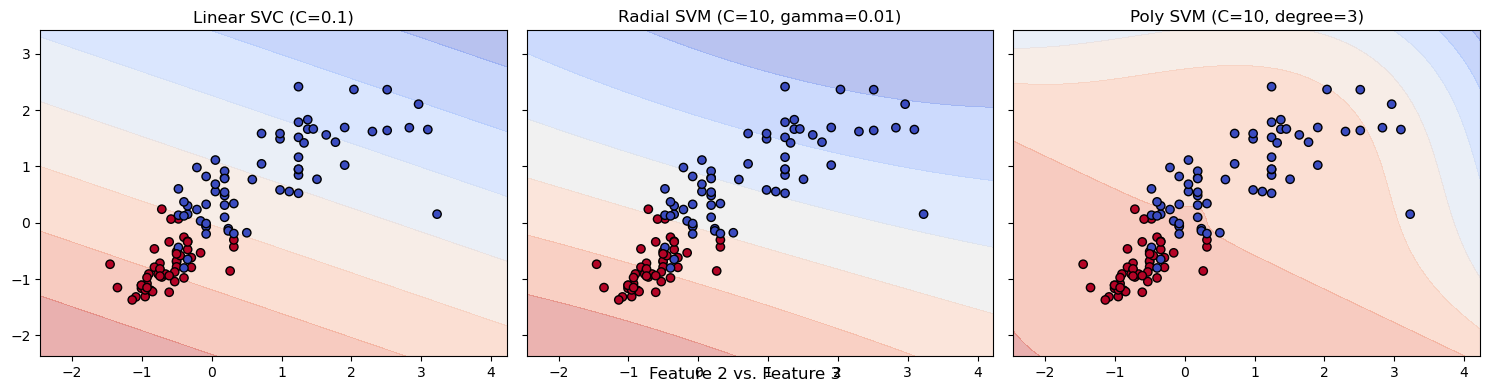

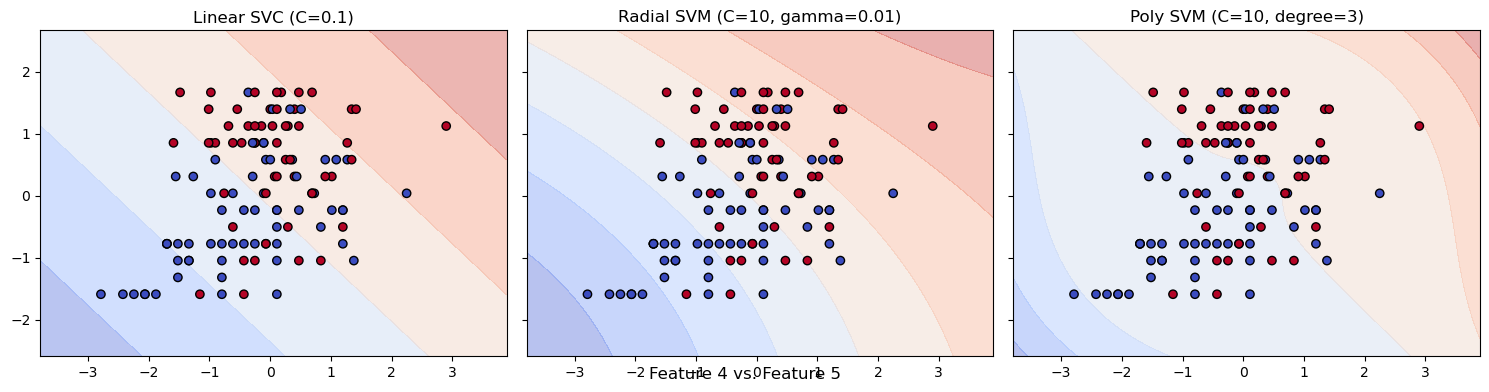

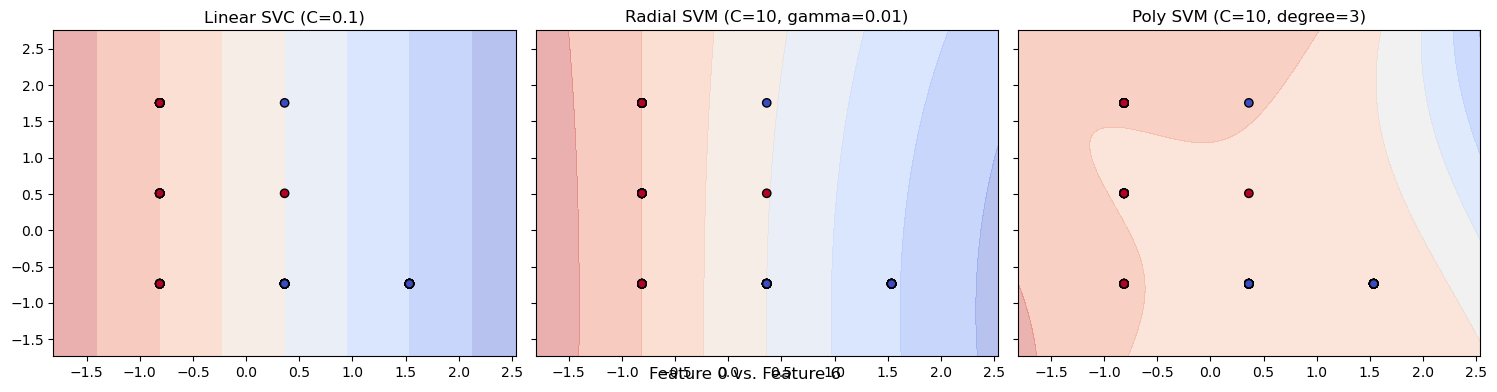

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Define a function to plot the decision boundary and support vectors
def plot_svm_decision_boundary(X, y, model, ax, title=None):
    # Plot the decision boundary
    DecisionBoundaryDisplay.from_estimator(model, X, cmap='coolwarm', alpha=0.4, ax=ax)
    
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    
    # Set the title for the plot
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f"Decision boundary and support vectors")

# Function to visualize the decision boundaries of different SVM models
def visualize_svm(X, y, models, model_names):
    # Split the data into training and test sets (using the same split from earlier)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Plot decision boundaries for pairs of features at a time
    feature_pairs = [(0, 1), (2, 3), (4, 5), (0,6)]  # Indices of pairs of features to plot
    for feature_pair in feature_pairs:
        # Create a subplot for each pair of features
        fig, axes = plt.subplots(1, len(models), figsize=(15, 4), sharey=True)
        
        for i, (model, model_name) in enumerate(zip(models, model_names)):
            # Fit the model using the selected pair of features
            model.fit(X_train_scaled[:, feature_pair], y_train)
            
            # Plot the decision boundary and support vectors
            plot_svm_decision_boundary(X_test_scaled[:, feature_pair], y_test, model, axes[i], title=model_name)
        
        # Add labels for the features being plotted
        fig.text(0.5, 0.04, f"Feature {feature_pair[0]} vs. Feature {feature_pair[1]}", ha='center', fontsize=12)
        
        # Display the plot
        plt.tight_layout()
        plt.show()

# Define the SVM models
models = [
    SVC(C=0.1, kernel='linear', random_state=1),  # Linear kernel with C=0.1
    SVC(C=10, kernel='rbf', gamma=0.01, random_state=1),  # Radial kernel with C=10 and gamma=0.01
    SVC(C=10, kernel='poly', degree=3, random_state=1)  # Polynomial kernel with C=10 and degree=3
]

# Names for the models
model_names = [
    'Linear SVC (C=0.1)',
    'Radial SVM (C=10, gamma=0.01)',
    'Poly SVM (C=10, degree=3)'
]

# Visualize the decision boundaries for different models
visualize_svm(X_scaled, y, models, model_names)


### 8. This problem involves the OJ data set which is part of the ISLP package.

### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the OJ dataset
oj = pd.read_csv('OJ.csv', na_values=['?']).dropna()

# Basic preprocessing
# Encode target variable 'Purchase' and the categorical column 'Store7'
oj['Purchase'] = oj['Purchase'].map({'MM': 0, 'CH': 1})
oj['Store7'] = oj['Store7'].replace({'Yes': 1, 'No': 0})

# Split the data into training and test sets
X = oj.drop(columns=['Purchase'])
y = oj['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### (b) Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as predictors. How many support points are there?

In [2]:
# Create a linear SVC with C = 0.01
svc_linear = SVC(C=0.01, kernel='linear', random_state=42)

# Fit the linear SVC to the training data
svc_linear.fit(X_train, y_train)

# Calculate the number of support points
num_support_points = len(svc_linear.support_)

print(f"Number of support points in the linear SVC: {num_support_points}")


Number of support points in the linear SVC: 618


### (c) What are the training and test error rates?

In [3]:
# Calculate training error rate
train_predictions_linear = svc_linear.predict(X_train)
train_error_rate_linear = 1 - accuracy_score(y_train, train_predictions_linear)

# Calculate test error rate
test_predictions_linear = svc_linear.predict(X_test)
test_error_rate_linear = 1 - accuracy_score(y_test, test_predictions_linear)

print(f"Training error rate of linear SVC: {train_error_rate_linear:.4f}")
print(f"Test error rate of linear SVC: {test_error_rate_linear:.4f}")


Training error rate of linear SVC: 0.2357
Test error rate of linear SVC: 0.2425


### (d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.

In [4]:
# Define the parameter grid for C values
param_grid = {'C': np.logspace(-2, 1, 10)}

# Create a GridSearchCV object with linear SVC and cross-validation
grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best value of C
best_C_linear = grid_search.best_params_['C']

print(f"Optimal C for linear SVC: {best_C_linear}")


Optimal C for linear SVC: 0.46415888336127775


### (e) Compute the training and test error rates using this new value for C.

In [5]:
# Fit a linear SVC with the optimal C value
svc_linear_optimal = SVC(C=best_C_linear, kernel='linear', random_state=42)
svc_linear_optimal.fit(X_train, y_train)

# Calculate training error rate
train_predictions_linear_optimal = svc_linear_optimal.predict(X_train)
train_error_rate_linear_optimal = 1 - accuracy_score(y_train, train_predictions_linear_optimal)

# Calculate test error rate
test_predictions_linear_optimal = svc_linear_optimal.predict(X_test)
test_error_rate_linear_optimal = 1 - accuracy_score(y_test, test_predictions_linear_optimal)

print(f"Training error rate of linear SVC with optimal C: {train_error_rate_linear_optimal:.4f}")
print(f"Test error rate of linear SVC with optimal C: {test_error_rate_linear_optimal:.4f}")


Training error rate of linear SVC with optimal C: 0.1571
Test error rate of linear SVC with optimal C: 0.1903


### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

In [6]:
# Create an SVM with radial kernel using the default gamma
svc_radial = SVC(kernel='rbf', random_state=42)

# Fit the SVM with radial kernel to the training data
svc_radial.fit(X_train, y_train)

# Calculate training error rate
train_predictions_radial = svc_radial.predict(X_train)
train_error_rate_radial = 1 - accuracy_score(y_train, train_predictions_radial)

# Calculate test error rate
test_predictions_radial = svc_radial.predict(X_test)
test_error_rate_radial = 1 - accuracy_score(y_test, test_predictions_radial)

print(f"Training error rate of SVM with radial kernel: {train_error_rate_radial:.4f}")
print(f"Test error rate of SVM with radial kernel: {test_error_rate_radial:.4f}")


Training error rate of SVM with radial kernel: 0.3840
Test error rate of SVM with radial kernel: 0.4067


### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [7]:
# Create an SVM with polynomial kernel (degree = 2)
svc_poly = SVC(kernel='poly', degree=2, random_state=42)

# Fit the SVM with polynomial kernel to the training data
svc_poly.fit(X_train, y_train)

# Calculate training error rate
train_predictions_poly = svc_poly.predict(X_train)
train_error_rate_poly = 1 - accuracy_score(y_train, train_predictions_poly)

# Calculate test error rate
test_predictions_poly = svc_poly.predict(X_test)
test_error_rate_poly = 1 - accuracy_score(y_test, test_predictions_poly)

print(f"Training error rate of SVM with polynomial kernel (degree = 2): {train_error_rate_poly:.4f}")
print(f"Test error rate of SVM with polynomial kernel (degree = 2): {test_error_rate_poly:.4f}")


Training error rate of SVM with polynomial kernel (degree = 2): 0.3840
Test error rate of SVM with polynomial kernel (degree = 2): 0.4067


### (h) Overall, which approach seems to give the best results on this data?

In [8]:
print("\nSummary of different approaches:")
print(f"Linear SVC with C = 0.01: Training error rate = {train_error_rate_linear:.4f}, Test error rate = {test_error_rate_linear:.4f}")
print(f"Linear SVC with optimal C: Training error rate = {train_error_rate_linear_optimal:.4f}, Test error rate = {test_error_rate_linear_optimal:.4f}")
print(f"SVM with radial kernel: Training error rate = {train_error_rate_radial:.4f}, Test error rate = {test_error_rate_radial:.4f}")
print(f"SVM with polynomial kernel (degree = 2): Training error rate = {train_error_rate_poly:.4f}, Test error rate = {test_error_rate_poly:.4f}")

# The approach with the lowest test error rate is considered the best.



Summary of different approaches:
Linear SVC with C = 0.01: Training error rate = 0.2357, Test error rate = 0.2425
Linear SVC with optimal C: Training error rate = 0.1571, Test error rate = 0.1903
SVM with radial kernel: Training error rate = 0.3840, Test error rate = 0.4067
SVM with polynomial kernel (degree = 2): Training error rate = 0.3840, Test error rate = 0.4067


The best approach in terms of overall performance is the Linear SVC with optimal C, which has the lowest test error rate of 0.1903 compared to the other approaches. This suggests it generalizes better to new data, making it the most effective model for predicting whether a given car gets high or low gas mileage based on the Auto data set.